
# Training a Decision Tree or a Random Forest on a classification problem, and compare the latter with using adaBoost

**Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris**


## 1. Decision Trees with SciKit-Learn on a very simple dataset

**We will first work on very simple classic dataset: Iris, which is a classification problem corresponding to determination of iris flower sub-species based on a few geometric characteristics of the flower.**

**Please FIRST READ the [*Iris DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py).**
In this classification problem, there are 3 classes, with a total of 150 examples (each one with 4 input). Please **now execute code cell below to load and view the dataset**.


In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

# Load Iris classification dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Print all 150 examples
print("(Number_of_examples, example_size) = " , iris.data.shape, "\n")
for i in range(0, 150) :
    print('Input = ', iris.data[i], ' , Label = ', iris.target[i] )


(Number_of_examples, example_size) =  (150, 4) 

Input =  [5.1 3.5 1.4 0.2]  , Label =  0
Input =  [4.9 3.  1.4 0.2]  , Label =  0
Input =  [4.7 3.2 1.3 0.2]  , Label =  0
Input =  [4.6 3.1 1.5 0.2]  , Label =  0
Input =  [5.  3.6 1.4 0.2]  , Label =  0
Input =  [5.4 3.9 1.7 0.4]  , Label =  0
Input =  [4.6 3.4 1.4 0.3]  , Label =  0
Input =  [5.  3.4 1.5 0.2]  , Label =  0
Input =  [4.4 2.9 1.4 0.2]  , Label =  0
Input =  [4.9 3.1 1.5 0.1]  , Label =  0
Input =  [5.4 3.7 1.5 0.2]  , Label =  0
Input =  [4.8 3.4 1.6 0.2]  , Label =  0
Input =  [4.8 3.  1.4 0.1]  , Label =  0
Input =  [4.3 3.  1.1 0.1]  , Label =  0
Input =  [5.8 4.  1.2 0.2]  , Label =  0
Input =  [5.7 4.4 1.5 0.4]  , Label =  0
Input =  [5.4 3.9 1.3 0.4]  , Label =  0
Input =  [5.1 3.5 1.4 0.3]  , Label =  0
Input =  [5.7 3.8 1.7 0.3]  , Label =  0
Input =  [5.1 3.8 1.5 0.3]  , Label =  0
Input =  [5.4 3.4 1.7 0.2]  , Label =  0
Input =  [5.1 3.7 1.5 0.4]  , Label =  0
Input =  [4.6 3.6 1.  0.2]  , Label =  0
Input = 

**Building, training and evaluating a simple Decision Tree classifier**

The SciKit-learn class for Decision Tree classifiers is sklearn.tree.DecisionTreeClassifier.

**Please FIRST READ (and understand!) the [*DecisionTreeClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to understand all parameters of the contructor.**

**You can then begin by running the code block below, in which default set of parameter values has been used.** If graphical view works, look at the structure of the learnt decision tree.

**Then, check the influence of MAIN parameters for Decision Tree classifier, i.e.:**
 - **homegeneity criterion ('gini' or 'entropy')**
 - **max_depth**
 - **min_samples_split**
 
NB : Note that post-training *PRUNING* IS unfortunately *NOT* implemented in SciKit-Learn Decision-Trees :(

In [2]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test part
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Learn a Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, 
                                  min_samples_split=2, min_samples_leaf=3, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=1e-07, class_weight=None)
clf = clf.fit(X_train, y_train)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_impurity_decrease=1e-07, min_samples_leaf=3)
Acuracy (on test set) =  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.91      0.95        11
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


 CONFUSION MATRIX
[[20  0  0]
 [ 0 10  1]
 [ 0  0 14]]


In [8]:
!pip install graphviz

[sudo] password for jpldev: 

In [4]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 5.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=3a176e4731db974b968b618df9cbd186155501694d5475c8cf5798d084e73911
  Stored in directory: /home/jpldev/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus


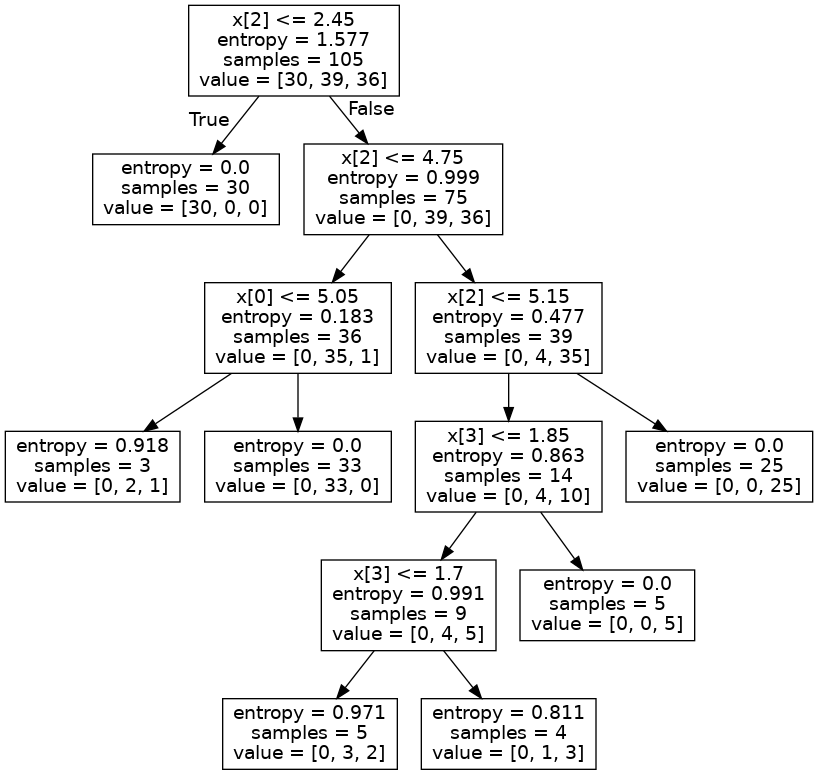

In [3]:
# Graphical view of learnt Decision Tree
#
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
# graph.write_pdf("iris.pdf")
from IPython.display import Image 
Image(graph.create_png()) 

[Text(0.375, 0.9166666666666666, 'x[2] <= 2.45\nentropy = 1.577\nsamples = 105\nvalue = [30, 39, 36]'),
 Text(0.25, 0.75, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5, 0.75, 'x[2] <= 4.75\nentropy = 0.999\nsamples = 75\nvalue = [0, 39, 36]'),
 Text(0.25, 0.5833333333333334, 'x[0] <= 5.05\nentropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.125, 0.4166666666666667, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.375, 0.4166666666666667, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.75, 0.5833333333333334, 'x[2] <= 5.15\nentropy = 0.477\nsamples = 39\nvalue = [0, 4, 35]'),
 Text(0.625, 0.4166666666666667, 'x[3] <= 1.85\nentropy = 0.863\nsamples = 14\nvalue = [0, 4, 10]'),
 Text(0.5, 0.25, 'x[3] <= 1.7\nentropy = 0.991\nsamples = 9\nvalue = [0, 4, 5]'),
 Text(0.375, 0.08333333333333333, 'entropy = 0.971\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(0.625, 0.08333333333333333, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.2

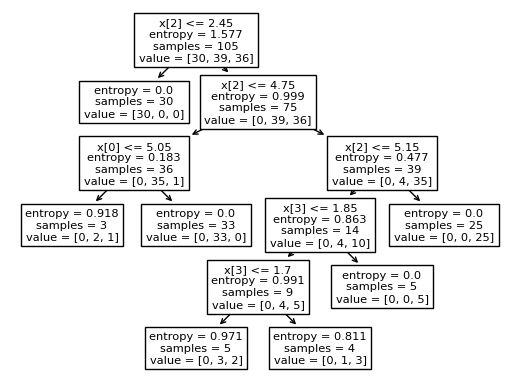

In [4]:
tree.plot_tree(clf) 

## 2. Decision Trees on a  MORE REALISTIC DATASET: HANDWRITTEN DIGITS

**Please FIRST READ the [*Digits DATASET DESCRIPTION*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py).**

In this classification problem, there are 10 classes, with a total of 1797 examples (each one being a 64D vector corresponding to an 8x8 pixmap). Please **now execute code cell below to load the dataset, visualize a typical example, and train a Desicion Tree on it**. 
The original code uses a **SUBOPTIMAL set of learning hyperparameters values. Try to play with them in order to improve acuracy.**

Finally, **find a somewhat optimized setting of the set of 3 main hyper-parameters for Decision Tree learning, by using CROSS-VALIDATION** (see cross-validation example from the Multi-Layer Perceptron notebook used in earlier practical session).

Look at final acuracy statistics, and also at the confusion-matrix: what digits are the most confused with each other ?

Number_of-examples =  1797

 Plot of first example


<Figure size 640x480 with 0 Axes>

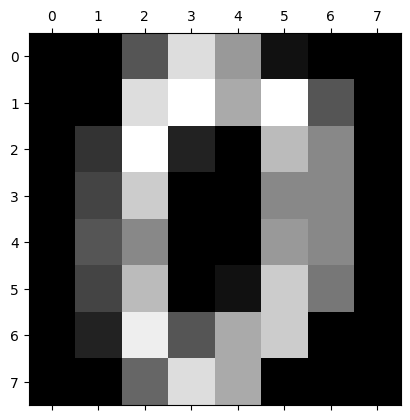

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=1e-07,
                       min_samples_split=4)
Acuracy (on test set) =  0.7296996662958843
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       100
           1       0.79      0.47      0.59        90
           2       0.70      0.64      0.67        85
           3       0.76      0.78      0.77        95
           4       0.75      0.87      0.81        89
           5       0.91      0.63      0.74        92
           6       0.74      0.84      0.78       106
           7       0.76      0.84      0.80        80
           8       0.42      0.66      0.51        79
           9       0.68      0.71      0.69        83

    accuracy                           0.73       899
   macro avg       0.75      0.73      0.73       899
weighted avg       0.76      0.73      0.73       899


 CONFUSION MATRIX
[[84  0  0  1  2  0  3  0  6  4]
 [ 0 42  7  4 10  0  6  8 10  3]
 [ 

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

# Split dataset into training and test part
X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Create and train a Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, 
                                  min_samples_split=4, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=1e-07, class_weight=None)
clf = clf.fit(X_train, y_train)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


In [6]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['gini', 'entropy'], 
              'max_depth':[6,8,10,12,14], 'min_samples_split':[2,3,4,5,6]}

# Initialise classifier SVM
tree = tree.DecisionTreeClassifier()

# Initialise cross validation
clf = GridSearchCV(tree, parameters)

# Run cross validation croisée on train set
clf.fit(X_train, y_train)

print("Results of cross-validation :")
print("Best: %f using %s" % (clf.best_score_,
                             clf.best_params_))

print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


Results of cross-validation :
Best: 0.827412 using {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 3}
GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 14],
                         'min_samples_split': [2, 3, 4, 5, 6]})
Acuracy (on test set) =  0.8153503893214683
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       100
           1       0.69      0.83      0.75        90
           2       0.82      0.81      0.82        85
           3       0.77      0.80      0.78        95
           4       0.86      0.83      0.85        89
           5       0.79      0.87      0.83        92
           6       0.96      0.87      0.91       106
           7       0.90      0.78      0.83        80
           8       0.64      0.65      0.64        79
           9       0.77      0.72      0.75        83

    accuracy 

## 3. Building, training and evaluating a Random Forest classifier

The SciKit-learn class for Random Forest classifiers is Please sklearn.ensemble.RandomForestClassifier.

**Please FIRST READ (and understand!) the [*RandomForestClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to understand all parameters of the contructor.**

**Then you can begin by running the code block below, in which default set of parameter values has been used.** As you will see, a RandomForest (even rather small) can easily outperform single Decision Tree. 

**Then, check the influence of MAIN parameters for Random Forest classifier, i.e.:**
 - **n_estimators (number of trees in forest)**
 - **max_depth**
 - **max_features (max number of features used at each node split)**

**Finally, find a somewhat optimized setting of the above set of 3 main parameters, by using CROSS-VALIDATION.**

In [9]:
X_train

array([[ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  1., ..., 14.,  9.,  0.],
       [ 0.,  0.,  0., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  1.,  0.,  0.],
       [ 0.,  0.,  9., ..., 15.,  6.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                             min_samples_split=2, min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_leaf_nodes=None, min_impurity_decrease=1e-07, bootstrap=True, 
                             oob_score=False, n_jobs=1, random_state=None, 
                             verbose=0, warm_start=False, class_weight=None)
clf = clf.fit(X_train, y_train)
print("n_estimators=", clf.n_estimators, " max_depth=",clf.max_depth,
      "max_features=", clf.max_features)

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


n_estimators= 10  max_depth= None max_features= sqrt
RandomForestClassifier(min_impurity_decrease=1e-07, n_estimators=10, n_jobs=1)
Acuracy (on test set) =  0.9154616240266963
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       100
           1       0.84      0.92      0.88        90
           2       0.93      0.94      0.94        85
           3       0.86      0.87      0.87        95
           4       0.94      0.94      0.94        89
           5       0.94      0.89      0.92        92
           6       1.00      0.95      0.98       106
           7       0.94      0.94      0.94        80
           8       0.84      0.84      0.84        79
           9       0.90      0.83      0.86        83

    accuracy                           0.92       899
   macro avg       0.91      0.91      0.91       899
weighted avg       0.92      0.92      0.92       899


 CONFUSION MATRIX
[[100   0   0   0   0   0   0   0   0   0]
 [ 

In [8]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10,50,100], 
              'max_features':['auto','log2',None], 'max_depth':[None,5,10,15,20]}

# Initialiser un classifieur SVM
forest = RandomForestClassifier()

# Initialiser une validation croisée
clf = GridSearchCV(forest, parameters)

# Faire tourner la validation croisée sur le jeu d'entraînement
clf=clf.fit(X_train, y_train)

print("Résultats de la cross-validation :")
print("Best: %f using %s" % (clf.best_score_,
                             clf.best_params_))

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


/home/jpldev/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/home/jpldev/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jpldev/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/jpldev/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/jpldev/.loca

Résultats de la cross-validation :
Best: 0.974389 using {'max_depth': None, 'max_features': 'log2', 'n_estimators': 50}
GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'log2', None],
                         'n_estimators': [10, 50, 100]})
Acuracy (on test set) =  0.9521690767519466
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.94      0.98      0.96        90
           2       1.00      0.98      0.99        85
           3       0.97      0.95      0.96        95
           4       0.96      0.97      0.96        89
           5       0.93      0.95      0.94        92
           6       1.00      0.94      0.97       106
           7       0.93      0.97      0.95        80
           8       0.91      0.90      0.90        79
           9       0.90      0.89      0.90        83

    accu

## 3. Building, training and evaluating an AdaBoost classifier

The SciKit-learn class for adaBoost is sklearn.ensemble.AdaBoostClassifier.

**Please FIRST READ (and understand!) the [*AdaBoostClassifier DOCUMENTATION*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) to understand all parameters of the contructor.**

**Then begin by running the code block below, in which a default set of parameter values has been used.** Look at the training curve: you can see that **training error goes down to zero rather quickly, and that test_error continues to diminish with increasing iterations**.

**Then, check the influence of MAIN parameters for adaBoost classifier, i.e.:**
 - ** base_estimator (ie type of Weak Classifier/Learner)** 
 - **n_estimators (number of boosting iterations, and therefore also number of weak classifiers)**
 - algorithm
 
In particular, check which other types of classifiers can be used as Weak Classifier with the adaBoost implementation of SciKit-Learn.

NB: in principle it is possible to use MLP classifiers as weak classifiers, but not with SciKit-learn implementation of MLPClassifier (because weighting of examples is not handled).

The error on the test set can continue to decrease when the error on the train is zero, because the algo will widen the margins (between the 2 classes), so that there will be fewer and fewer errors in the test set. The "margin" in the adaBoost sense is the difference between the highest boostingValue (weighted sum of weak classifiers) of the negatives and the lowest boostingValue of the positives.

Weights of weak classifiers:  [5.26294922 5.80718532 5.15520584 6.27501869 5.80654291 5.66105605
 6.52744706 5.38348204 6.34292703 6.56300178 5.76571061 6.61208844
 6.25541643 6.84246981 6.74245867 7.53417718 6.33532609 6.97651047
 8.78907564 6.28087798 6.78964926 7.22923713 7.84671589 6.87148091
 6.92175566 6.83512638 8.01199491 7.42114172 6.92068368 6.21332606
 7.10618314 7.05197267 6.84757273 7.80121782 6.44954035 6.54452737
 7.27732526 7.68086579 6.78801777 7.32076178 7.7232778  6.11896543
 6.98434234 6.12254006 5.06556642 7.74554198 7.66734974 5.83329044
 7.26801033 7.04439416 6.23082201 7.65238161 7.72394061 5.58711047
 7.81326205 7.35970564 7.68868264 7.22627022 7.33051568 7.53035172
 6.80515082 7.14313621 6.78446311 6.18897729 6.33454857 7.8738433
 6.56688512 6.23484793 7.42775412 6.26922035 3.65884104 8.17006411
 8.27657484 7.25913788 6.75545416 6.19494716 6.07268095 7.15632064
 4.79522991 5.82016483 8.27458832 7.58017935 6.51912445 7.35239818
 7.45043785 6.91283558 6.04689085

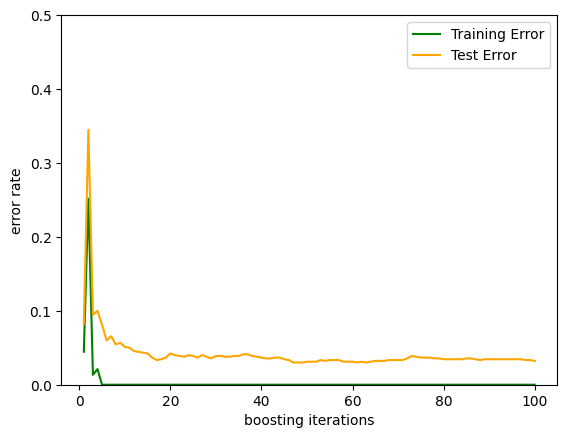

Acuracy (on test set) =  0.967741935483871
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.96      0.99      0.97        90
           2       1.00      0.96      0.98        85
           3       0.97      0.95      0.96        95
           4       1.00      0.97      0.98        89
           5       0.96      0.98      0.97        92
           6       1.00      0.97      0.99       106
           7       1.00      0.97      0.99        80
           8       0.85      0.95      0.90        79
           9       0.94      0.93      0.93        83

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


 CONFUSION MATRIX
[[100   0   0   0   0   0   0   0   0   0]
 [  0  89   0   0   0   0   0   0   1   0]
 [  0   0  82   0   0   0   0   0   3   0]
 [  0   0   0  90   0   1   0   0   2   2]
 [  0  

In [13]:
from sklearn.ensemble import AdaBoostClassifier

# Create and train an adaBoost classifier using SMALL Decision Trees as weak classifiers
#weak_learner = tree.DecisionTreeClassifier(max_depth=4)
weak_learner = RandomForestClassifier(n_estimators=10, max_depth=5)
clf = AdaBoostClassifier(weak_learner, n_estimators=100, learning_rate=1.0, algorithm='SAMME', 
                         random_state=None)
clf = clf.fit(X_train, y_train)

print("Weights of weak classifiers: ", clf.estimator_weights_)
      
# Plot training curves (error = f(iterations))
n_iter = 100
from sklearn.metrics import zero_one_loss
ada_train_err = np.zeros((100,))
for i, y_pred in enumerate(clf.staged_predict(X_train)):
    ada_train_err[i] = zero_one_loss(y_pred, y_train)
ada_test_err = np.zeros((100,))
for i, y_pred in enumerate(clf.staged_predict(X_test)):
    ada_test_err[i] = zero_one_loss(y_pred, y_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(n_iter) + 1, ada_train_err,
        label='Training Error',
        color='green')
ax.plot(np.arange(n_iter) + 1, ada_test_err,
        label='Test Error',
        color='orange')
ax.set_ylim((0.0, 0.5))
ax.set_xlabel('boosting iterations')
ax.set_ylabel('error rate')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()

# Evaluate acuracy on test data
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {'n_estimators':[ 10, 20, 30, 40],
              'estimator__max_depth':[1,5,10,13,15],
             }

DTC = DecisionTreeClassifier(random_state = 11,max_depth = None)
ABC = AdaBoostClassifier(estimator = DTC)
# run grid search
clf = GridSearchCV(ABC, param_grid=parameters)

# Faire tourner la validation croisée sur le jeu d'entraînement
clf=clf.fit(X_train, y_train)

print("Résultats de la cross-validation :")
print("Best: %f using %s" % (clf.best_score_,
                             clf.best_params_))

# Evaluate acuracy on test data
print(clf)
score = clf.score(X_test, y_test)
print("Acuracy (on test set) = ", score)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_true, y_pred = y_test, clf.predict(X_test)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )


/home/jpldev/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/jpldev/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/jpldev/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/jpldev/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  war

Résultats de la cross-validation :
Best: 0.951012 using {'estimator__max_depth': 5, 'n_estimators': 40}
GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=11)),
             param_grid={'estimator__max_depth': [1, 5, 10, 13, 15],
                         'n_estimators': [10, 20, 30, 40]})
Acuracy (on test set) =  0.9399332591768632
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.98      0.94      0.96        90
           2       1.00      0.91      0.95        85
           3       0.99      0.92      0.95        95
           4       1.00      0.96      0.98        89
           5       0.93      0.91      0.92        92
           6       1.00      0.93      0.97       106
           7       0.94      0.99      0.96        80
           8       0.72      0.99      0.83        79
           9       0.89      0.86      0.87        83

    accuracy                     